# Pokemón

## Librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_rows = 400
pd.options.display.max_columns = None
import cufflinks as cf
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cf.go_offline()

from termcolor import colored
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score

## Funciones

In [2]:
def k_optimo_kmeans(data_frame,k_min,k_max):
    
    sse,db,slc = {}, {}, {}
    for k in range(k_min, k_max+1):
        kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=210327, n_jobs=-1).fit(data_frame)
        clusters = kmeans.labels_
        sse[k] = kmeans.inertia_
        db[k] = davies_bouldin_score(data_frame,clusters)
        slc[k] = silhouette_score(data_frame,clusters)

    print(colored(f"Kmeans - Método del codo (Inercia)",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(sse.keys()), list(sse.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

    print(colored(f"Kmeans - Davies-Bouldin",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(db.keys()), list(db.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Davies-Bouldin values")
    plt.show()

    print(colored(f"Kmeans - Silhouette",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(slc.keys()), list(slc.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Silhouette score")
    plt.show()
    
    
def k_optimo_aglomerative(data_frame,k_min,k_max,affini='euclidean',link='ward'):
    
    sse,db,slc = {}, {}, {}
    for k in range(k_min, k_max+1):
        Agglomerative = AgglomerativeClustering(n_clusters=k,affinity=affini,linkage=link ).fit(data_frame)
        clusters = Agglomerative.labels_
        #sse[k] = Agglomerative.inertia_
        db[k] = davies_bouldin_score(data_frame,clusters)
        slc[k] = silhouette_score(data_frame,clusters)

    #print(colored(f"Agglomerative - Método del codo (Inercia)",'red',attrs=['bold']))
    #plt.figure(figsize=(15,10))
    #plt.plot(list(sse.keys()), list(sse.values()), "bx-")
    #plt.xlabel("Number of cluster")
    #plt.ylabel("SSE")
    #plt.show()

    print(colored(f"Agglomerative - Davies-Bouldin",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(db.keys()), list(db.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Davies-Bouldin values")
    plt.show()

    print(colored(f"Agglomerative - Silhouette",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(slc.keys()), list(slc.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Silhouette score")
    plt.show()
    
def k_optimo_kmedoids(data_frame,k_min,k_max,metrica='euclidean'):
    
    sse,db,slc = {}, {}, {}
    for k in range(k_min, k_max+1):
        kmedoids = KMedoids(n_clusters=k,max_iter=1000, random_state=210327,metric=metrica ).fit(data_frame)
        clusters = kmedoids.labels_
        sse[k] = kmedoids.inertia_
        db[k] = davies_bouldin_score(data_frame,clusters)
        slc[k] = silhouette_score(data_frame,clusters)

    print(colored(f"Kmedoids - Método del codo (Inercia)",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(sse.keys()), list(sse.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

    print(colored(f"Kmedoids - Davies-Bouldin",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(db.keys()), list(db.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Davies-Bouldin values")
    plt.show()

    print(colored(f"Kmedoids - Silhouette",'red',attrs=['bold']))
    plt.figure(figsize=(15,10))
    plt.plot(list(slc.keys()), list(slc.values()), "bx-")
    plt.xlabel("Number of cluster")
    plt.ylabel("Silhouette score")
    plt.show()

## Data

In [3]:
pokemon = pd.read_csv('/home/uriel/ciencia_datos/modulo3/datasets/pokemon.csv')
pokemon.head()

,Abilities,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Classfication,Defense,Experience_Growth,Height_M,Hp,Japanese_Name,Name,Percentage_Male,Pokedex_Number,Sp_Attack,Sp_Defense,Speed,Type1,Type2,Weight_Kg,Generation,Is_Legendary
0,"['Volt Absorb', 'Quick Feet']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,65,8960,70,525,45,Lightning Pokémon,60,1000000,0.8,65,Thundersサンダース,Jolteon,88.1,135,110,95,130,electric,NaN,24.5,1,0
1,"['Pickup', 'Gluttony', 'Quick Feet']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70,3840,70,420,90,Rush Pokémon,61,1000000,0.5,78,Massugumaマッスグマ,Linoone,50.0,264,50,61,100,normal,NaN,32.5,3,0
2,"['Liquid Ooze', 'Sticky Hold', 'Gluttony']",0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,73,5120,70,467,75,Poison Bag Pokémon,83,1640000,1.7,100,Marunoomマルノーム,Swalot,50.0,317,73,83,55,poison,NaN,80.0,3,0
3,"['Bulletproof', 'Soundproof', 'Overcoat']",1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,55,10240,70,300,45,Scaly Pokémon,65,1250000,0.6,45,Jyarakoジャラコ,Jangmo-o,50.0,782,45,45,45,dragon,NaN,29.7,7,0
4,"['Water Absorb', 'Damp', 'Swift Swim']",0.5,0.5,1.0,2.0,2.0,1.0,0.5,2.0,1.0,2.0,1.0,0.5,1.0,1.0,2.0,0.5,0.5,0.5,95,5120,70,510,45,Tadpole Pokémon,95,1059860,1.3,90,Nyorobonニョロボン,Poliwrath,50.0,62,70,90,70,water,fighting,54.0,1,0


In [4]:
pokemon.columns

Index(['Abilities', 'Against_Bug', 'Against_Dark', 'Against_Dragon',
       'Against_Electric', 'Against_Fairy', 'Against_Fight', 'Against_Fire',
       'Against_Flying', 'Against_Ghost', 'Against_Grass', 'Against_Ground',
       'Against_Ice', 'Against_Normal', 'Against_Poison', 'Against_Psychic',
       'Against_Rock', 'Against_Steel', 'Against_Water', 'Attack',
       'Base_Egg_Steps', 'Base_Happiness', 'Base_Total', 'Capture_Rate',
       'Classfication', 'Defense', 'Experience_Growth', 'Height_M', 'Hp',
       'Japanese_Name', 'Name', 'Percentage_Male', 'Pokedex_Number',
       'Sp_Attack', 'Sp_Defense', 'Speed', 'Type1', 'Type2', 'Weight_Kg',
       'Generation', 'Is_Legendary'],
      dtype='object')

In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Abilities          801 non-null    object 
 1   Against_Bug        801 non-null    float64
 2   Against_Dark       801 non-null    float64
 3   Against_Dragon     801 non-null    float64
 4   Against_Electric   801 non-null    float64
 5   Against_Fairy      801 non-null    float64
 6   Against_Fight      801 non-null    float64
 7   Against_Fire       801 non-null    float64
 8   Against_Flying     801 non-null    float64
 9   Against_Ghost      801 non-null    float64
 10  Against_Grass      801 non-null    float64
 11  Against_Ground     801 non-null    float64
 12  Against_Ice        801 non-null    float64
 13  Against_Normal     801 non-null    float64
 14  Against_Poison     801 non-null    float64
 15  Against_Psychic    801 non-null    float64
 16  Against_Rock       801 non

# Data Cleaning

## Completitud de Datos

In [6]:
pokemon.isnull().sum()

Abilities              0
Against_Bug            0
Against_Dark           0
Against_Dragon         0
Against_Electric       0
Against_Fairy          0
Against_Fight          0
Against_Fire           0
Against_Flying         0
Against_Ghost          0
Against_Grass          0
Against_Ground         0
Against_Ice            0
Against_Normal         0
Against_Poison         0
Against_Psychic        0
Against_Rock           0
Against_Steel          0
Against_Water          0
Attack                 0
Base_Egg_Steps         0
Base_Happiness         0
Base_Total             0
Capture_Rate           0
Classfication          0
Defense                0
Experience_Growth      0
Height_M              20
Hp                     0
Japanese_Name          0
Name                   0
Percentage_Male       98
Pokedex_Number         0
Sp_Attack              0
Sp_Defense             0
Speed                  0
Type1                  0
Type2                384
Weight_Kg             20
Generation             0


In [7]:
pokemon.Capture_Rate.unique()

array(['45', '90', '75', '190', '225', '60', '127', '200', '120', '255',
       '50', '3', '30', '235', '145', '25', '140', '155', '100', '125',
       '65', '70', '55', '180', '130', '160', '150', '220', '80',
       '30 (Meteorite)255 (Core)', '15', '35', '170', '205'], dtype=object)

In [8]:
# mediana altura
median_height = pokemon.Height_M.median()
# mediana peso
median_weight = pokemon.Weight_Kg.median()
# imptutación porcentaje macho
porcentaje_macho = 110
# tipo dos
tipo_2_input = 'Ninguna'

## Imputación

In [9]:
# inputación de variables
pokemon['Height_M'] = pokemon.Height_M.fillna(median_height)
pokemon['Weight_Kg'] = pokemon.Weight_Kg.fillna(median_weight)
pokemon['Percentage_Male'] = pokemon.Percentage_Male.fillna(porcentaje_macho)
pokemon['Type2'] = pokemon.Type2.fillna(tipo_2_input)

In [10]:
# list of abilities
pokemon['Abilities'] = pokemon['Abilities'].apply(lambda x: x.strip('][').split(', '))

# cleaning names
abilities_f = []
for i in range(pokemon.shape[0]):
    abilities = ''
    for j in pokemon['Abilities'][i]:
        abilities += (' ' + j.split("'")[1])
    
    abilities_f.append(abilities.strip())

In [11]:
# new abilities
pokemon['Abilities'] = abilities_f

# abilities vector 
cv_ab = CountVectorizer(ngram_range=(1,1), min_df=10, max_df=1.0, max_features=100)
cv_ab.fit(pokemon['Abilities'])
ab_w = pd.DataFrame(data=cv_ab.transform(pokemon['Abilities']).todense(),
                      columns=[f"ability_{x}" for x in cv_ab.get_feature_names()])

# joining tables
pokemon = pokemon.drop(columns = ['Abilities']).join(ab_w)

In [12]:
# pokemon capture
pokemon.Capture_Rate.unique()

array(['45', '90', '75', '190', '225', '60', '127', '200', '120', '255',
       '50', '3', '30', '235', '145', '25', '140', '155', '100', '125',
       '65', '70', '55', '180', '130', '160', '150', '220', '80',
       '30 (Meteorite)255 (Core)', '15', '35', '170', '205'], dtype=object)

In [13]:
# chnage value
capture_index = pokemon[pokemon['Capture_Rate'] == '30 (Meteorite)255 (Core)'].index[0]
pokemon['Capture_Rate'][capture_index] = 30

# to integer
pokemon['Capture_Rate'] = pokemon['Capture_Rate'].astype(int)

In [14]:
# classfication dictionary
class_dic = dict(zip(pokemon['Name'], pokemon['Classfication']))
# dropping japanese name
pokemon.drop(columns = ['Japanese_Name'], inplace = True)

In [15]:
pokemon.head()

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Classfication,Defense,Experience_Growth,Height_M,Hp,Name,Percentage_Male,Pokedex_Number,Sp_Attack,Sp_Defense,Speed,Type1,Type2,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak
0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,65,8960,70,525,45,Lightning Pokémon,60,1000000,0.8,65,Jolteon,88.1,135,110,95,130,electric,Ninguna,24.5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70,3840,70,420,90,Rush Pokémon,61,1000000,0.5,78,Linoone,50.0,264,50,61,100,normal,Ninguna,32.5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,73,5120,70,467,75,Poison Bag Pokémon,83,1640000,1.7,100,Swalot,50.0,317,73,83,55,poison,Ninguna,80.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,55,10240,70,300,45,Scaly Pokémon,65,1250000,0.6,45,Jangmo-o,50.0,782,45,45,45,dragon,Ninguna,29.7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.5,0.5,1.0,2.0,2.0,1.0,0.5,2.0,1.0,2.0,1.0,0.5,1.0,1.0,2.0,0.5,0.5,0.5,95,5120,70,510,45,Tadpole Pokémon,95,1059860,1.3,90,Poliwrath,50.0,62,70,90,70,water,fighting,54.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
# types
pokemon_2 = pokemon.copy()[['Name','Type1']]
pokemon_3 = pokemon.copy()[['Name','Type2']]
pokemon_3.rename(columns = {'Type2': 'Type1'}, inplace = True)
type_f = pd.concat((pokemon_2, pokemon_3), axis = 0,ignore_index = True)

# pivot
type_f['dumm'] = 1
agg_data = type_f.pivot_table(index = 'Name', columns=['Type1'], aggfunc="sum", fill_value=0)
agg_data.columns = agg_data.columns.droplevel(0)
agg_2 = agg_data.reset_index()

# merge 
pokemon = pokemon.merge(agg_2, how = 'left', on = 'Name')
pokemon.head()

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Classfication,Defense,Experience_Growth,Height_M,Hp,Name,Percentage_Male,Pokedex_Number,Sp_Attack,Sp_Defense,Speed,Type1,Type2,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,65,8960,70,525,45,Lightning Pokémon,60,1000000,0.8,65,Jolteon,88.1,135,110,95,130,electric,Ninguna,24.5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70,3840,70,420,90,Rush Pokémon,61,1000000,0.5,78,Linoone,50.0,264,50,61,100,normal,Ninguna,32.5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,73,5120,70,467,75,Poison Bag Pokémon,83,1640000,1.7,100,Swalot,50.0,317,73,83,55,poison,Ninguna,80.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,55,10240,70,300,45,Scaly Pokémon,65,1250000,0.6,45,Jangmo-o,50.0,782,45,45,45,dragon,Ninguna,29.7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.5,0.5,1.0,2.0,2.0,1.0,0.5,2.0,1.0,2.0,1.0,0.5,1.0,1.0,2.0,0.5,0.5,0.5,95,5120,70,510,45,Tadpole Pokémon,95,1059860,1.3,90,Poliwrath,50.0,62,70,90,70,water,fighting,54.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
## drop variables
pokemon.drop(columns = [#'Classfication', 
                        #'Type1', 'Type2', 
                        'Pokedex_Number'], inplace = True)
pokemon.set_index(pokemon['Name'], inplace = True)
pokemon.drop(columns = ['Name'], inplace = True)

In [18]:
# final table
pokemon.head()

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Classfication,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Type1,Type2,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jolteon,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,65,8960,70,525,45,Lightning Pokémon,60,1000000,0.8,65,88.1,110,95,130,electric,Ninguna,24.5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Linoone,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70,3840,70,420,90,Rush Pokémon,61,1000000,0.5,78,50.0,50,61,100,normal,Ninguna,32.5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Swalot,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,73,5120,70,467,75,Poison Bag Pokémon,83,1640000,1.7,100,50.0,73,83,55,poison,Ninguna,80.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Jangmo-o,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,55,10240,70,300,45,Scaly Pokémon,65,1250000,0.6,45,50.0,45,45,45,dragon,Ninguna,29.7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Poliwrath,0.5,0.5,1.0,2.0,2.0,1.0,0.5,2.0,1.0,2.0,1.0,0.5,1.0,1.0,2.0,0.5,0.5,0.5,95,5120,70,510,45,Tadpole Pokémon,95,1059860,1.3,90,50.0,70,90

## REDUCCIÓN DE DIMENSIONES

In [19]:
# Se crea la variable X (es toda la base ya que no hay una variable objetivo)
X = pokemon.drop(columns = ['Classfication','Type1', 'Type2']).copy()

# Se escalan las variables
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [20]:
# Se definen los metodos para reducción
Xs = pd.DataFrame(scaler.transform(X),columns=X.columns,index=X.index)
pca = PCA(n_components=2)
mds = MDS(n_components=2,n_jobs=-1)
tsne = TSNE(n_components=2, perplexity=0)
pca.fit(Xs)

PCA(n_components=2)

### PCA

In [21]:
# Se corre PCA
Xp = pd.DataFrame(data=pca.fit_transform(Xs), columns=["p1", "p2"], index=Xs.index)
print(Xp.head())
# Graficando 
Xp.sample(frac = 0.1).iplot(kind="scatter", mode="markers", x="p1", y="p2",  title=f"PCA")

                 p1        p2
Name                         
Jolteon    0.854370  0.091532
Linoone   -1.816030  0.690288
Swalot     0.551684  0.009367
Jangmo-o  -0.557275 -1.130449
Poliwrath  0.249721  1.649497


In [22]:
# Varianza explicada de cada componente
expl = pca.explained_variance_ratio_
print('Varianza Explicada x componente:', expl)

# Suma de la varianza explicada 
total = sum(expl[0:16])
print('Total de Varianza Explicada:', (total)*100)

Varianza Explicada x componente: [0.04868036 0.03909553]
Total de Varianza Explicada: 8.777589084707719


### MDS

In [23]:
# Se define
mds = MDS(n_components=2, n_jobs=-1)
Xsample = Xs.sample(frac = 0.1)

# Se corre MDS
Xm = pd.DataFrame(data=mds.fit_transform(Xsample), columns = ["d1", "d2"])

# Graficando 
mds_2=Xm.iplot(kind="scatter", mode="markers", x="d1", y="d2", title=f"MDS")

### T-SNE

In [24]:
for per in [100, 0, 50]:
    tsne = TSNE(random_state=777, perplexity=per)
    Xt = pd.DataFrame(data=tsne.fit_transform(Xs), columns=["d1", "d2"])
    Xt.sample(frac = 0.1).iplot(x="d1", y="d2", kind="scatter", mode='markers',title=f"t-SNE (perpleity: {per})")

In [25]:
for per in [100, 0, 30]:
    tsne = TSNE(random_state=500, perplexity=per)
    Xt = pd.DataFrame(data=tsne.fit_transform(Xs), columns=["d1", "d2"])
    Xt.sample(frac = 0.1).iplot(x="d1", y="d2", kind="scatter", mode='markers',title=f"t-SNE (perpleity: {per},'random_state=500')")

In [26]:
for per in [100, 30, 50]:
    tsne = TSNE(random_state=777, perplexity=per,learning_rate=160)
    Xt = pd.DataFrame(data=tsne.fit_transform(Xs), columns=["d1", "d2"])
    Xt.sample(frac = 0.1).iplot(x="d1", y="d2", kind="scatter", mode='markers',title=f"t-SNE (perpleity: {per},learning_rate=160)")

In [27]:
# final reduction
tsne = TSNE(random_state=777, perplexity=50,learning_rate=160)
pokemon_tsne = pd.DataFrame(data=tsne.fit_transform(Xs), columns=["d1", "d2"],index=Xs.index) 

### Clusterización

KMEAN


/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.

Kmeans - Método del codo (Inercia)


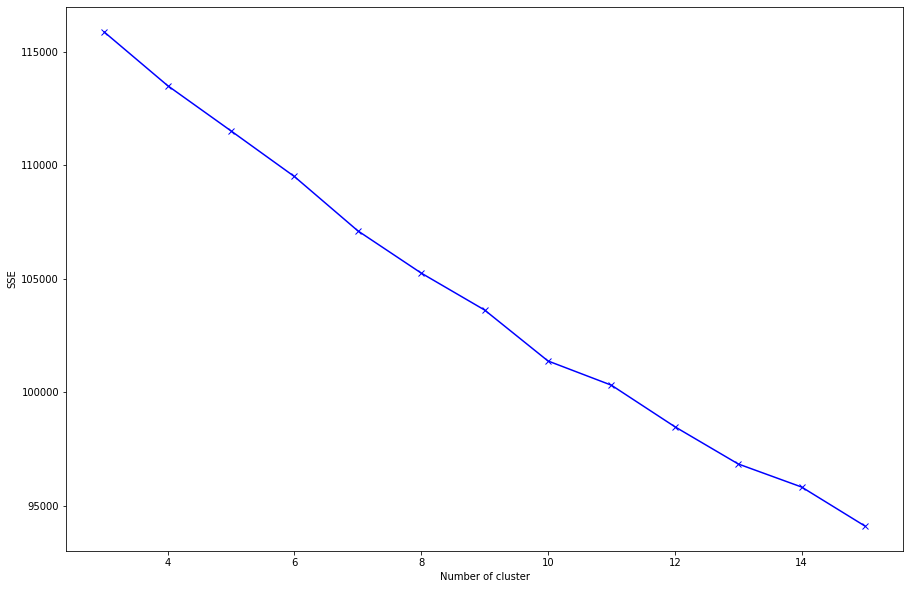

Kmeans - Davies-Bouldin


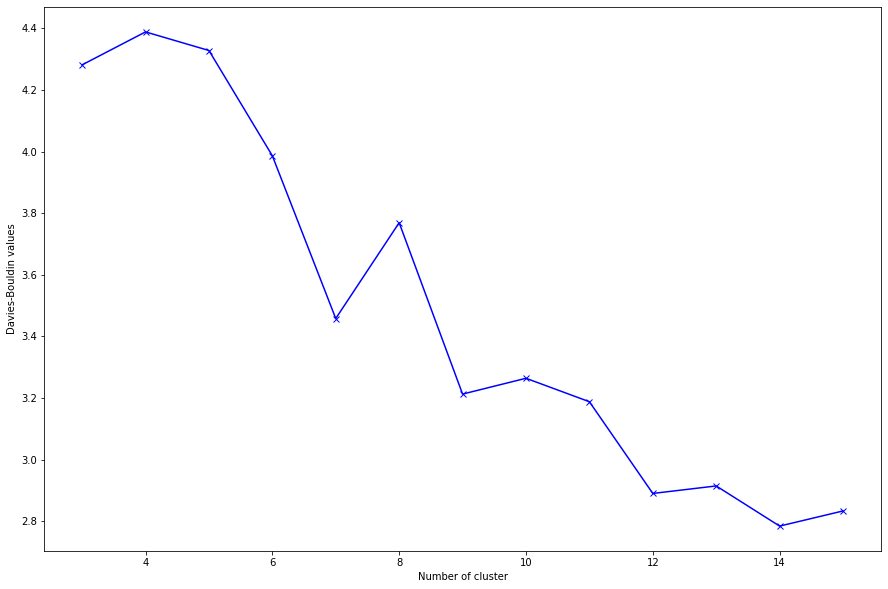

Kmeans - Silhouette


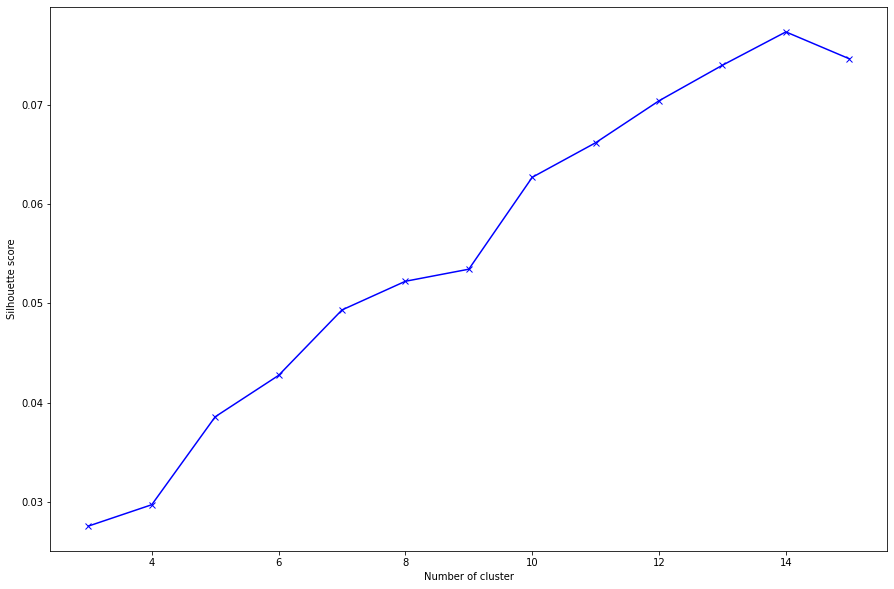

AGLOMERATIVE
Agglomerative - Davies-Bouldin


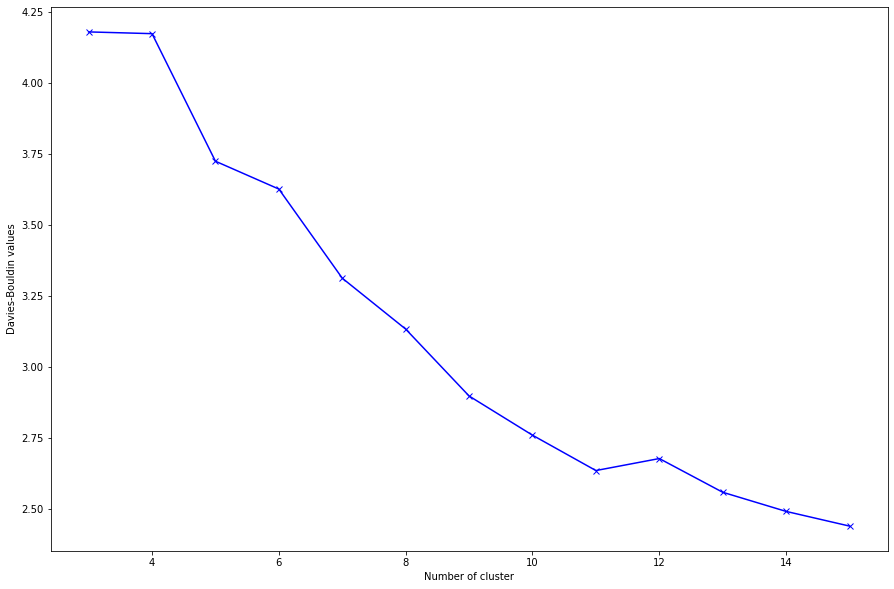

Agglomerative - Silhouette


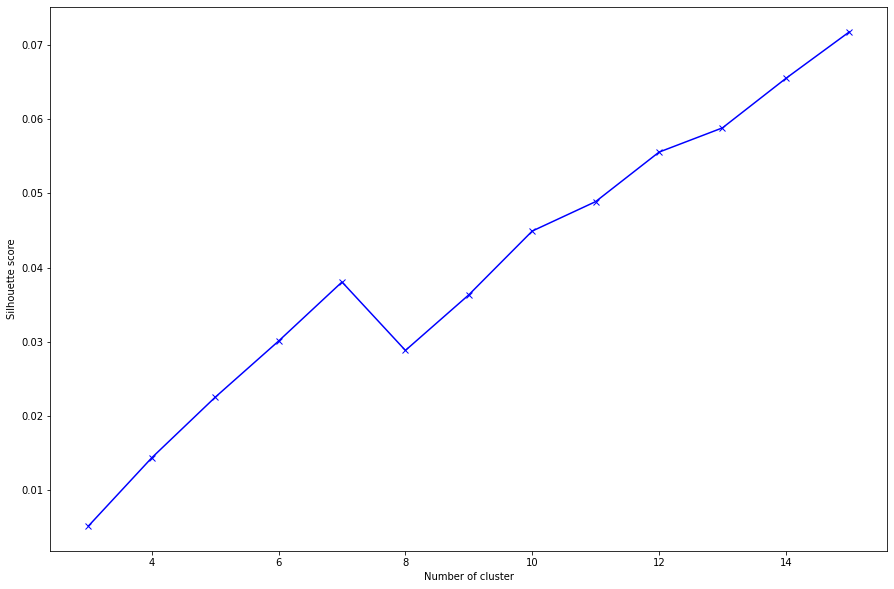

KMEDOIDS
Kmedoids - Método del codo (Inercia)


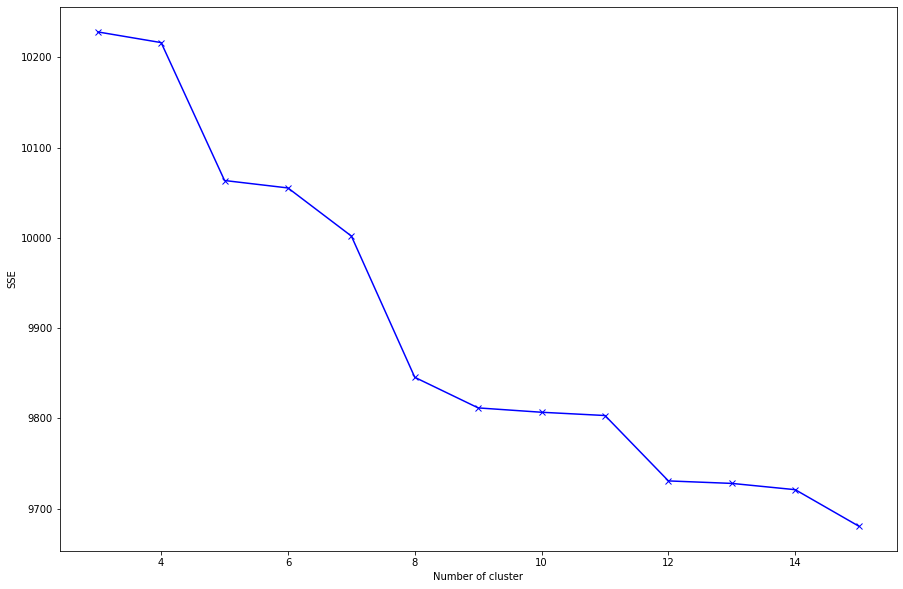

Kmedoids - Davies-Bouldin


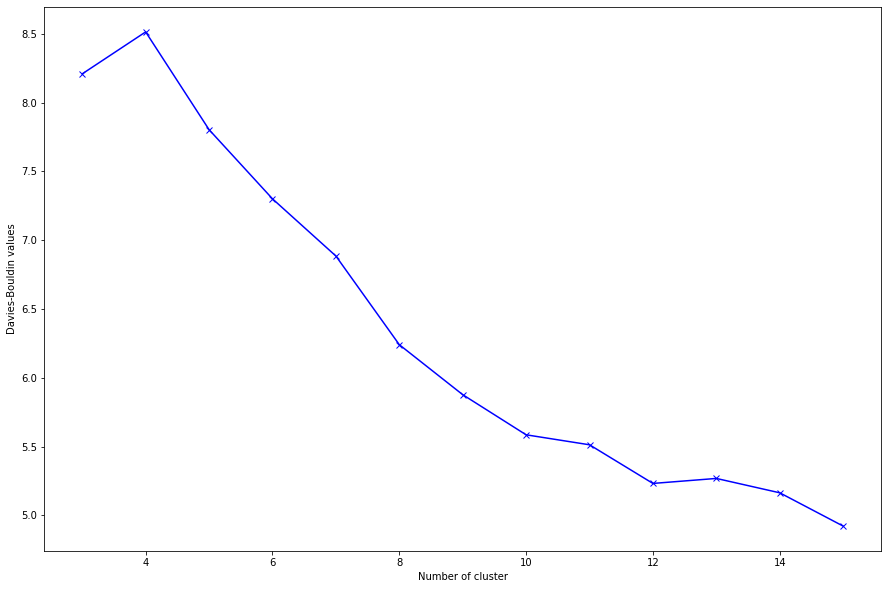

Kmedoids - Silhouette


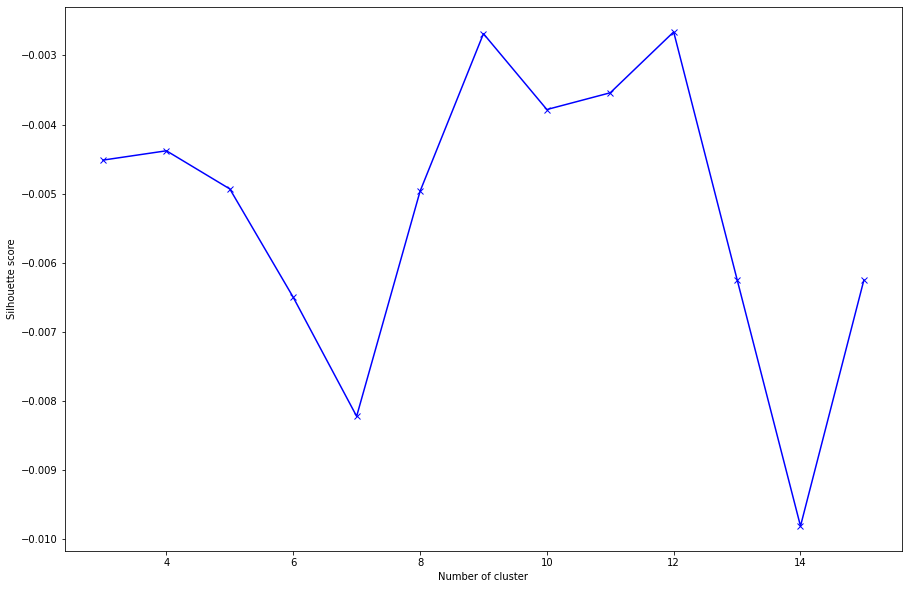

In [28]:
print('KMEAN')
k_optimo_kmeans(data_frame=Xs,k_min=3,k_max=15)
print('AGLOMERATIVE')
k_optimo_aglomerative(data_frame=Xs,k_min=3,k_max=15)
print('KMEDOIDS')
k_optimo_kmedoids(data_frame=Xs,k_min=3,k_max=15)

In [29]:
k=6
df_modelado=Xs
df_original=pokemon
df_escalado=pokemon_tsne

cluster_kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=210327,max_iter=1000)
cluster_agglomeratrive = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward" )
cluster_kmedoids = KMedoids(n_clusters=k,max_iter=1000, random_state=210327,metric="euclidean" )

df_original["cl_kmeans"] = df_escalado["cl_kmeans"] = [str(x) for x in cluster_kmeans.fit_predict(df_modelado)]
df_original["cl_agglomerative"] = df_escalado["cl_agglomerative"] = [str(x) for x in cluster_agglomeratrive.fit_predict(df_modelado)]
df_original["cl_kmedoids"] = df_escalado["cl_kmedoids"] = [str(x) for x in cluster_kmedoids.fit_predict(df_modelado)]

print(colored(f"Kmeans",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_kmeans", mode="markers")
print(colored(f"Agglomerative",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_agglomerative", mode="markers")
print(colored(f"Kmedoids",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_kmedoids", mode="markers")

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



Kmeans


/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Agglomerative


Kmedoids


In [30]:
pokemon.groupby("cl_kmeans").mean().style.background_gradient(cmap='Blues')

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
cl_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.031250,1.046875,0.984375,1.078125,1.203125,1.273438,1.125000,1.140625,0.968750,0.906250,1.031250,1.140625,0.953125,0.828125,1.046875,1.132812,0.984375,1.093750,87.968750,6920.000000,61.250000,457.125000,83.875000,69.906250,1055898.125000,1.353125,71.031250,64.703125,71.062500,77.406250,79.750000,97.418750,2.968750,0.093750,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.000000,0.062500,0.093750,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.031250,0.000000,0.031250,0.000000,0.062500,0.093750,1.000000,0.062500,0.000000,0.031250,0.093750,0.000000,0.000000,0.000000,0.000000,0.093750,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.156250,0.000000,0.000000,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.125000,0.000000,0.031250,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.656250,0.000000,0.125000,0.031250,0.031250,0.000000,0.218750,0.062500,0.156250,0.000000,0.000000,0.062500,0.093750,0.125000,0.093750,0.218750,0.000000,0.093750,0.031250
1,1.043860,1.035088,0.995614,1.859649,1.030702,1.074561,0.526316,1.004386,1.035088,2.166667,1.078947,0.576754,0.925439,0.912281,0.973684,1.074561,0.578947,0.605263,73.763158,5569.122807,69.649123,418.078947,100.859649,74.070175,1047944.385965,1.167544,67.631579,63.214912,71.675439,68.956140,61.982456,45.273684,3.140351,0.017544,0.192982,0.017544,0.184211,0.000000,0.000000,0.000000,0.000000,0.052632,0.017

In [31]:
pokemon.groupby("cl_kmedoids").mean().style.background_gradient(cmap='Blues')

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
cl_kmedoids,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.982639,0.895833,0.909722,0.958333,1.097222,1.170139,1.208333,1.170139,0.777778,0.774306,1.107639,1.277778,0.937500,1.118056,0.986111,1.437500,1.114583,1.125000,80.347222,5777.777778,67.430556,464.527778,108.680556,65.291667,1012333.888889,1.095833,71.319444,52.675000,77.750000,71.750000,98.069444,45.551389,5.208333,0.027778,0.041667,0.013889,0.041667,0.027778,0.027778,0.000000,0.027778,0.055556,0.041667,0.013889,0.041667,0.069444,0.000000,0.013889,0.013889,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.041667,0.000000,0.013889,0.027778,0.027778,0.000000,0.000000,0.013889,0.000000,0.013889,0.013889,0.083333,0.041667,0.000000,0.027778,0.013889,0.041667,0.000000,0.013889,0.055556,0.069444,0.000000,0.013889,0.041667,0.013889,0.027778,0.041667,0.041667,0.013889,0.027778,0.055556,0.027778,0.013889,0.055556,0.041667,0.027778,0.000000,0.000000,0.013889,0.013889,0.027778,0.013889,0.027778,0.027778,0.069444,0.027778,0.000000,0.000000,0.000000,0.069444,0.027778,0.000000,0.027778,0.000000,0.013889,0.013889,0.013889,0.041667,0.000000,0.000000,0.000000,0.041667,0.013889,0.013889,0.000000,0.000000,0.083333,0.055556,0.111111,0.013889,0.013889,0.041667,0.458333,0.111111,0.125000,0.041667,0.166667,0.125000,0.041667,0.111111,0.166667,0.027778,0.111111,0.041667,0.069444,0.208333,0.097222,0.027778,0.055556,0.013889,0.000000
1,0.990000,1.115000,0.900000,0.820000,0.900000,1.230000,1.550000,1.250000,0.950000,0.905000,1.170000,1.330000,0.830000,0.815000,0.975000,1.165000,1.060000,1.280000,60.820000,5683.200000,67.200000,371.160000,195.320000,81.860000,1027374.800000,1.088000,57.160000,56.524000,50.980000,83.680000,36.660000,60.328000,3.040000,0.040000,0.000000,0.000000,0.080000,0.080000,0.000000,0.020000,0.000000,0.080000,0.

In [32]:
pokemon.mean().to_frame().T

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,cl_kmeans,cl_agglomerative,cl_kmedoids
0,0.996255,1.057116,0.968789,1.07397,1.068976,1.065543,1.135456,1.192884,0.985019,1.03402,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,98.675406,73.008739,1.054996e+06,1.1598,68.958801,61.865793,71.305868,70.911361,66.334582,60.527216,3.690387,0.087391,0.036205,0.014981,0.066167,0.029963,0.014981,0.018727,0.028714,0.06367,0.026217,0.018727,0.017478,0.043695,0.01623,0.017478,0.019975,0.017478,0.013733,0.022472,0.01623,0.01623,0.018727,0.046192,0.028714,0.019975,0.021223,0.017478,0.019975,0.021223,0.03995,0.051186,0.026217,0.028714,0.014981,0.058677,0.026217,0.026217,0.024969,0.027466,0.017478,0.024969,0.03995,0.01623,0.038702,0.021223,0.046192,0.02372,0.041199,0.021223,0.014981,0.01623,0.018727,0.01623,0.019975,0.029963,0.024969,0.028714,0.027466,0.014981,0.022472,0.031211,0.034956,0.022472,0.01623,0.031211,0.01623,0.01623,0.014981,0.02372,0.022472,0.031211,0.029963,0.06367,0.021223,0.014981,0.019975,0.031211,0.027466,0.021223,0.042447,0.017478,0.026217,0.018727,0.017478,0.018727,0.051186,0.031211,0.047441,0.047441,0.018727,0.019975,0.026217,0.027466,0.028714,0.028714,0.014981,0.024969,0.059925,0.017478,0.047441,0.022472,0.479401,0.09613,0.062422,0.054931,0.059925,0.058677,0.066167,0.081149,0.122347,0.051186,0.122347,0.082397,0.047441,0.13608,0.082397,0.102372,0.073658,0.057428,0.163546,inf,inf,inf


KMEAN


/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.

Kmeans - Método del codo (Inercia)


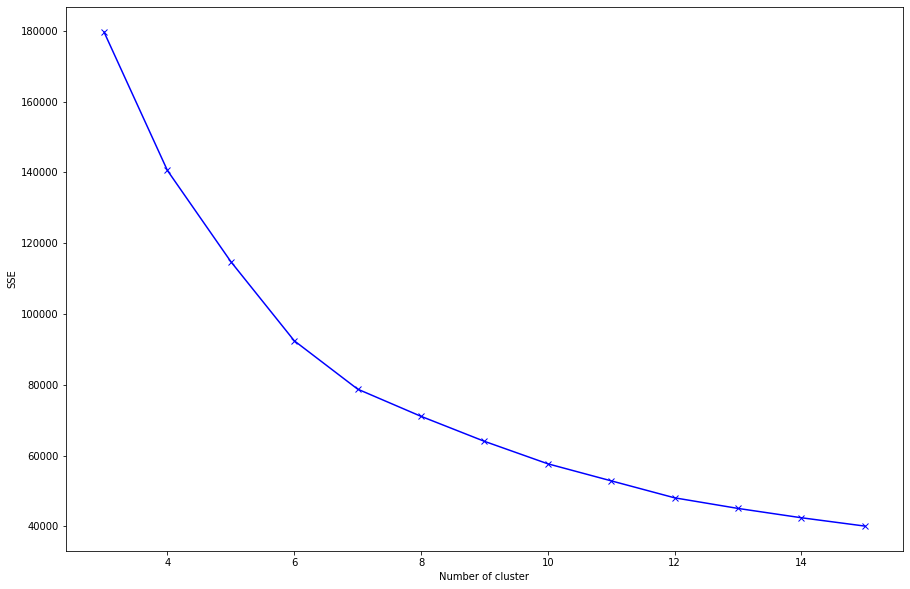

Kmeans - Davies-Bouldin


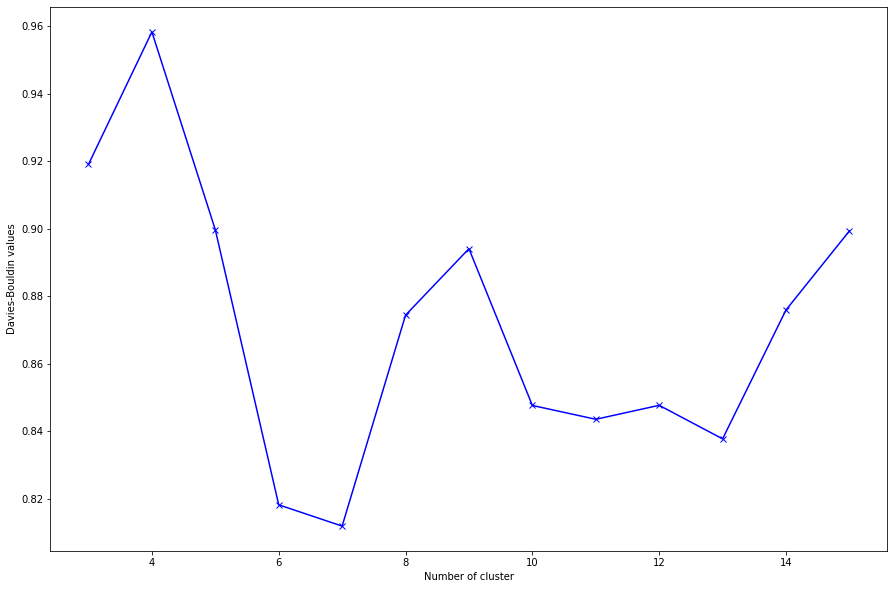

Kmeans - Silhouette


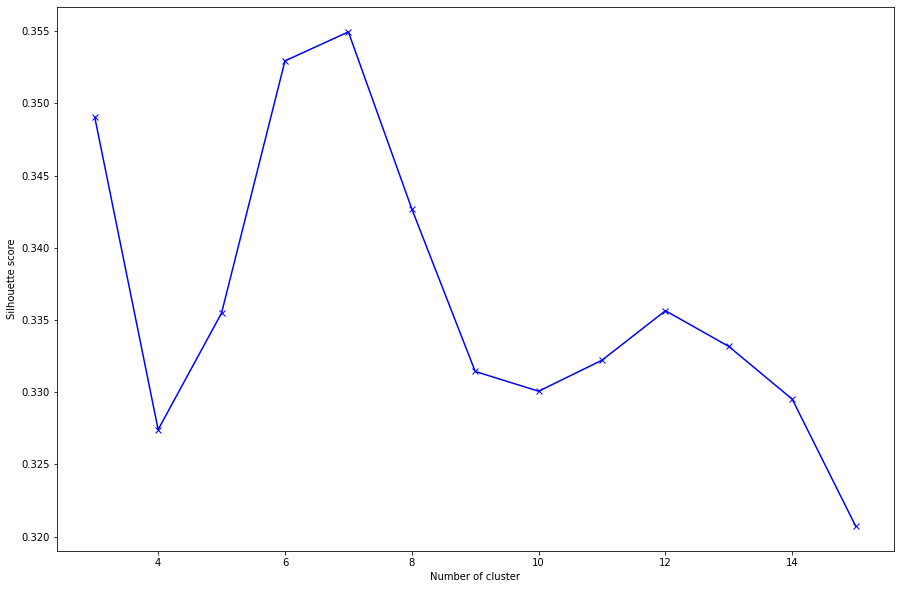

AGLOMERATIVE
Agglomerative - Davies-Bouldin


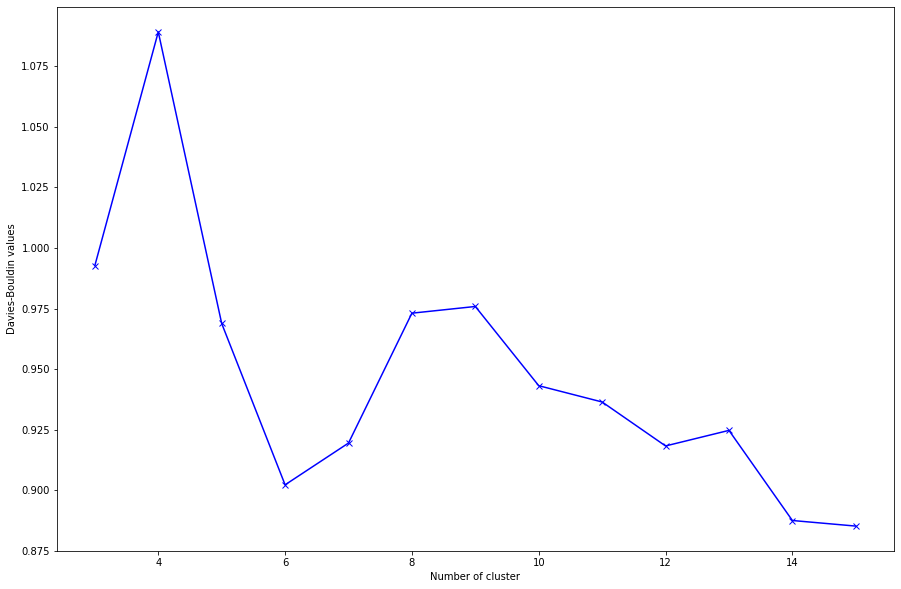

Agglomerative - Silhouette


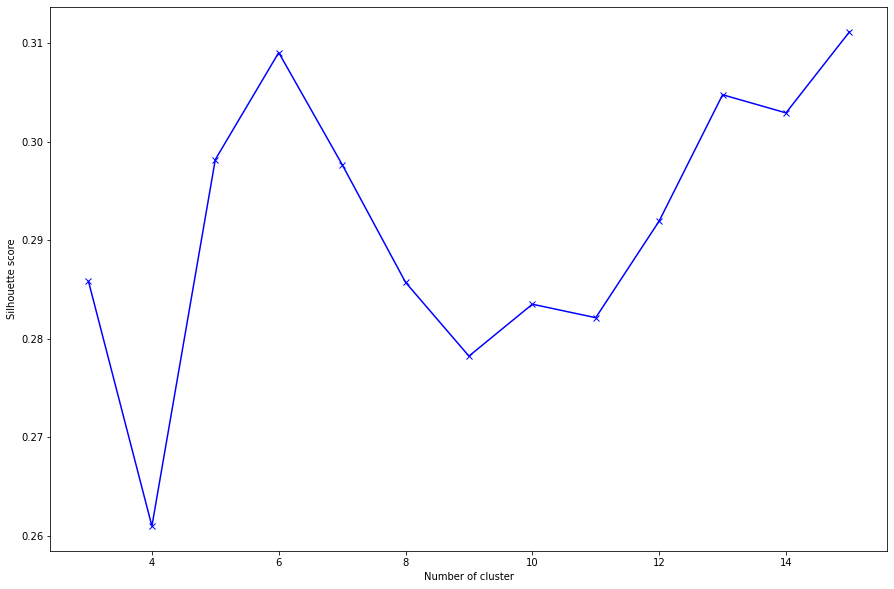

KMEDOIDS
Kmedoids - Método del codo (Inercia)


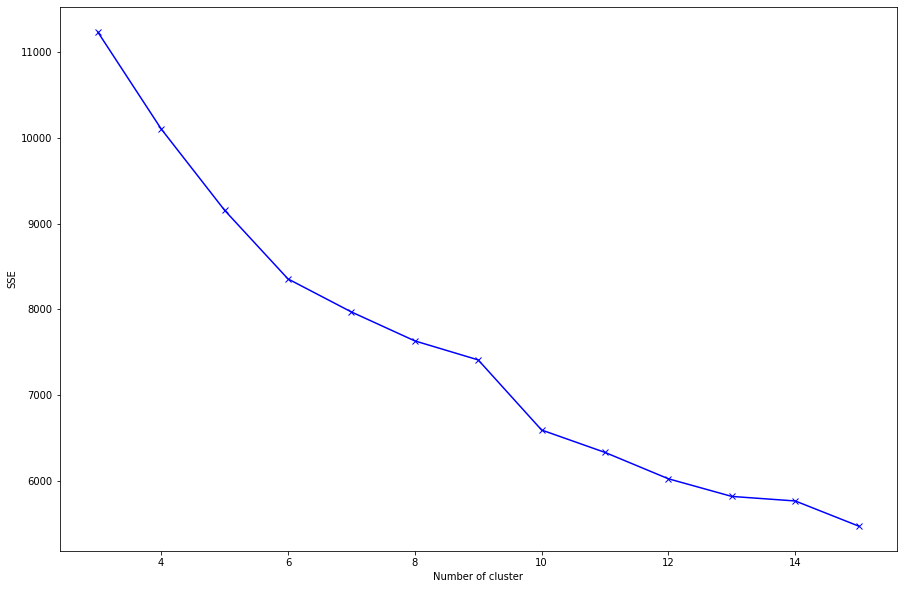

Kmedoids - Davies-Bouldin


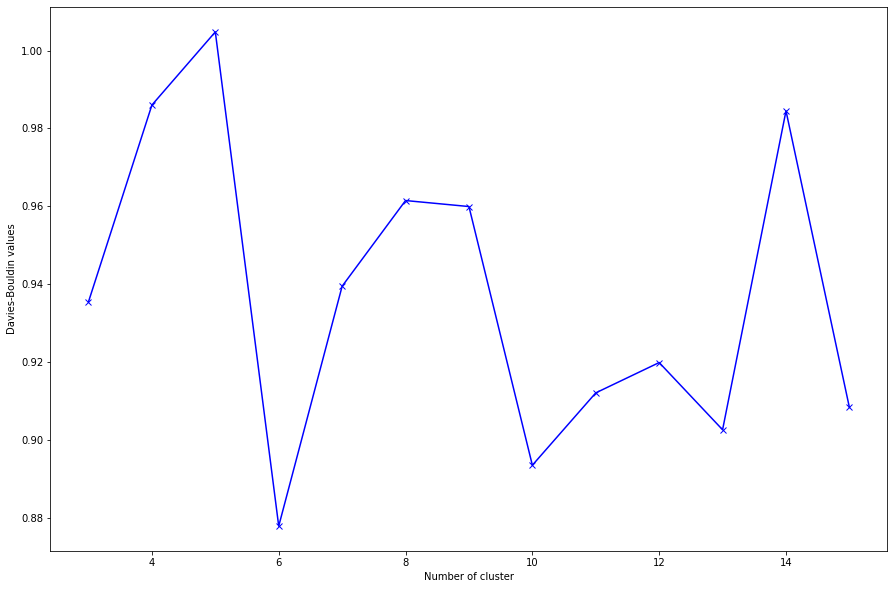

Kmedoids - Silhouette


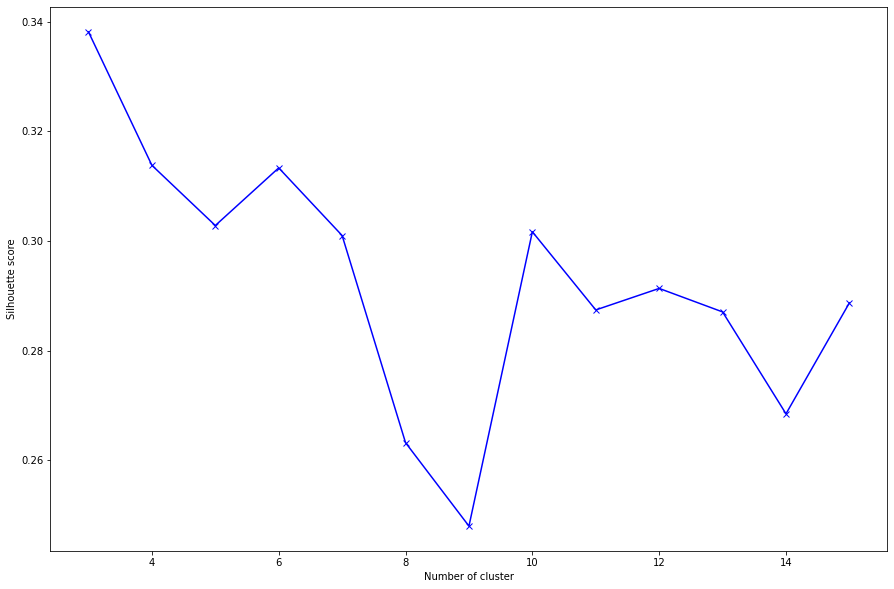

In [33]:
# t_sne
print('KMEAN')
k_optimo_kmeans(data_frame=pokemon_tsne,k_min=3,k_max=15)
print('AGLOMERATIVE')
k_optimo_aglomerative(data_frame=pokemon_tsne,k_min=3,k_max=15)
print('KMEDOIDS')
k_optimo_kmedoids(data_frame=pokemon_tsne,k_min=3,k_max=15)

In [34]:
k=6
df_modelado=pokemon_tsne
df_original=pokemon
df_escalado=pokemon_tsne

cluster_kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=210327,max_iter=1000)
cluster_agglomeratrive = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward" )
cluster_kmedoids = KMedoids(n_clusters=k,max_iter=1000, random_state=210327,metric="euclidean" )

df_original["cl_kmeans_t"] = df_escalado["cl_kmeans_t"] = [str(x) for x in cluster_kmeans.fit_predict(df_modelado)]
df_original["cl_agglomerative_t"] = df_escalado["cl_agglomerative_t"] = [str(x) for x in cluster_agglomeratrive.fit_predict(df_modelado)]
df_original["cl_kmedoids_t"] = df_escalado["cl_kmedoids_t"] = [str(x) for x in cluster_kmedoids.fit_predict(df_modelado)]

print(colored(f"Kmeans",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_kmeans_t", mode="markers")
print(colored(f"Agglomerative",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_agglomerative_t", mode="markers")
print(colored(f"Kmedoids",'red',attrs=['bold']))
df_escalado.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl_kmedoids_t", mode="markers")

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



Kmeans


/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/uriel/ciencia_datos/modulo1/carpeta1/lib/python3.8/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Agglomerative


Kmedoids


In [35]:
pokemon.groupby("cl_kmeans_t").mean().style.background_gradient(cmap='Blues')

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
cl_kmeans_t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.010684,1.380342,0.910256,0.752137,0.914530,0.942308,1.160256,1.096154,1.393162,1.166667,1.292735,1.448718,0.615385,0.850427,0.888889,1.070513,1.113248,1.448718,73.307692,5612.307692,67.008547,416.008547,103.735043,83.709402,1020133.846154,1.202564,62.794872,55.360684,69.401709,72.880342,53.914530,64.605128,3.572650,0.000000,0.017094,0.017094,0.085470,0.017094,0.000000,0.017094,0.000000,0.128205,0.000000,0.000000,0.025641,0.076923,0.000000,0.000000,0.017094,0.025641,0.017094,0.017094,0.000000,0.000000,0.017094,0.000000,0.051282,0.000000,0.000000,0.017094,0.076923,0.000000,0.025641,0.051282,0.076923,0.059829,0.000000,0.282051,0.025641,0.128205,0.034188,0.000000,0.000000,0.025641,0.025641,0.034188,0.000000,0.025641,0.000000,0.145299,0.068376,0.059829,0.000000,0.102564,0.000000,0.000000,0.017094,0.017094,0.034188,0.034188,0.034188,0.000000,0.034188,0.008547,0.008547,0.000000,0.000000,0.017094,0.000000,0.017094,0.025641,0.042735,0.000000,0.145299,0.017094,0.162393,0.000000,0.000000,0.008547,0.008547,0.000000,0.000000,0.034188,0.000000,0.000000,0.017094,0.025641,0.000000,0.196581,0.017094,0.000000,0.000000,0.111111,0.000000,0.059829,0.034188,0.051282,0.000000,0.000000,0.000000,0.136752,0.025641,0.034188,0.042735,0.452991,0.042735,0.017094,0.025641,0.017094,0.059829,0.000000,0.094017,0.076923,0.256410,0.196581,0.205128,0.000000,0.034188,0.025641,0.170940,0.196581,0.111111,0.017094
1,1.001938,0.965116,0.976744,1.631783,1.069767,1.143411,0.759690,1.075581,0.837209,1.666667,0.976744,0.879845,0.965116,1.058140,0.984496,1.131783,0.697674,0.651163,67.271318,5794.728682,70.465116,409.193798,104.674419,65.527132,1041192.558140,1.108527,72.953488,59.828682,69.031008,69.069767,65.341085,43.484496,3.395349,0.023256,0.147287,0.038760,0.046512,0.031008,0.093023,0.000000,0.000000,0.054264,0.

In [36]:
pokemon.groupby("cl_kmedoids_t").mean().style.background_gradient(cmap='Blues')

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
cl_kmedoids_t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.123547,1.029070,0.924419,0.918605,0.991279,0.920058,1.454942,1.421512,0.950581,0.845930,0.879360,1.444767,0.950581,1.165698,1.084302,1.340116,1.093023,0.962209,75.593023,5358.139535,68.662791,415.040698,101.040698,70.313953,1041533.953488,0.913953,67.976744,57.604070,69.017442,69.267442,62.872093,34.818023,4.011628,0.029070,0.034884,0.000000,0.040698,0.063953,0.000000,0.000000,0.000000,0.000000,0.005814,0.000000,0.000000,0.098837,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000,0.005814,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000,0.000000,0.011628,0.046512,0.023256,0.040698,0.000000,0.011628,0.005814,0.023256,0.023256,0.011628,0.000000,0.000000,0.011628,0.000000,0.046512,0.000000,0.000000,0.000000,0.075581,0.000000,0.011628,0.000000,0.000000,0.000000,0.011628,0.017442,0.040698,0.110465,0.000000,0.000000,0.023256,0.005814,0.005814,0.005814,0.011628,0.011628,0.000000,0.017442,0.000000,0.023256,0.005814,0.023256,0.063953,0.081395,0.000000,0.000000,0.005814,0.017442,0.023256,0.000000,0.023256,0.000000,0.000000,0.017442,0.000000,0.000000,0.023256,0.075581,0.011628,0.011628,0.000000,0.029070,0.040698,0.000000,0.000000,0.000000,0.034884,0.034884,0.087209,0.000000,0.017442,0.005814,0.540698,0.226744,0.005814,0.034884,0.069767,0.098837,0.029070,0.011628,0.110465,0.000000,0.255814,0.069767,0.017442,0.139535,0.122093,0.098837,0.075581,0.023256,0.069767
1,0.947531,0.904321,1.012346,0.808642,1.302469,1.095679,1.283951,1.416667,0.870370,0.802469,1.141975,1.308642,0.938272,1.117284,1.154321,1.058642,1.009259,0.944444,75.925926,6479.012346,69.814815,398.481481,105.987654,61.308642,1044787.160494,1.066667,70.518519,53.696296,60.333333,66.037037,64.358025,39.850617,3.913580,0.024691,0.000000,0.037037,0.000000,0.012346,0.000000,0.000000,0.000000,0.000000,

In [37]:
pokemon.mean().to_frame().T

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,cl_kmeans,cl_agglomerative,cl_kmedoids,cl_kmeans_t,cl_agglomerative_t,cl_kmedoids_t
0,0.996255,1.057116,0.968789,1.07397,1.068976,1.065543,1.135456,1.192884,0.985019,1.03402,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,98.675406,73.008739,1.054996e+06,1.1598,68.958801,61.865793,71.305868,70.911361,66.334582,60.527216,3.690387,0.087391,0.036205,0.014981,0.066167,0.029963,0.014981,0.018727,0.028714,0.06367,0.026217,0.018727,0.017478,0.043695,0.01623,0.017478,0.019975,0.017478,0.013733,0.022472,0.01623,0.01623,0.018727,0.046192,0.028714,0.019975,0.021223,0.017478,0.019975,0.021223,0.03995,0.051186,0.026217,0.028714,0.014981,0.058677,0.026217,0.026217,0.024969,0.027466,0.017478,0.024969,0.03995,0.01623,0.038702,0.021223,0.046192,0.02372,0.041199,0.021223,0.014981,0.01623,0.018727,0.01623,0.019975,0.029963,0.024969,0.028714,0.027466,0.014981,0.022472,0.031211,0.034956,0.022472,0.01623,0.031211,0.01623,0.01623,0.014981,0.02372,0.022472,0.031211,0.029963,0.06367,0.021223,0.014981,0.019975,0.031211,0.027466,0.021223,0.042447,0.017478,0.026217,0.018727,0.017478,0.018727,0.051186,0.031211,0.047441,0.047441,0.018727,0.019975,0.026217,0.027466,0.028714,0.028714,0.014981,0.024969,0.059925,0.017478,0.047441,0.022472,0.479401,0.09613,0.062422,0.054931,0.059925,0.058677,0.066167,0.081149,0.122347,0.051186,0.122347,0.082397,0.047441,0.13608,0.082397,0.102372,0.073658,0.057428,0.163546,inf,inf,inf,inf,inf,inf


### Perfilamiento

In [38]:
pokemon["cl_kmeans"].value_counts(1)

5    0.378277
3    0.189763
1    0.142322
4    0.138577
2    0.111111
0    0.039950
Name: cl_kmeans, dtype: float64

In [39]:
pokemon["cl_kmeans"].value_counts().iplot(kind="bar")

In [40]:
pokemon.groupby("cl_kmeans").mean().style.background_gradient(cmap='Blues')

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
cl_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.031250,1.046875,0.984375,1.078125,1.203125,1.273438,1.125000,1.140625,0.968750,0.906250,1.031250,1.140625,0.953125,0.828125,1.046875,1.132812,0.984375,1.093750,87.968750,6920.000000,61.250000,457.125000,83.875000,69.906250,1055898.125000,1.353125,71.031250,64.703125,71.062500,77.406250,79.750000,97.418750,2.968750,0.093750,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.000000,0.062500,0.093750,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.031250,0.000000,0.031250,0.000000,0.062500,0.093750,1.000000,0.062500,0.000000,0.031250,0.093750,0.000000,0.000000,0.000000,0.000000,0.093750,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.156250,0.000000,0.000000,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.125000,0.000000,0.031250,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.656250,0.000000,0.125000,0.031250,0.031250,0.000000,0.218750,0.062500,0.156250,0.000000,0.000000,0.062500,0.093750,0.125000,0.093750,0.218750,0.000000,0.093750,0.031250
1,1.043860,1.035088,0.995614,1.859649,1.030702,1.074561,0.526316,1.004386,1.035088,2.166667,1.078947,0.576754,0.925439,0.912281,0.973684,1.074561,0.578947,0.605263,73.763158,5569.122807,69.649123,418.078947,100.859649,74.070175,1047944.385965,1.167544,67.631579,63.214912,71.675439,68.956140,61.982456,45.273684,3.140351,0.017544,0.192982,0.017544,0.184211,0.000000,0.000000,0.000000,0.000000,0.052632,0.017

In [41]:
pokemon.mean().to_frame().T

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,cl_kmeans,cl_agglomerative,cl_kmedoids,cl_kmeans_t,cl_agglomerative_t,cl_kmedoids_t
0,0.996255,1.057116,0.968789,1.07397,1.068976,1.065543,1.135456,1.192884,0.985019,1.03402,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,98.675406,73.008739,1.054996e+06,1.1598,68.958801,61.865793,71.305868,70.911361,66.334582,60.527216,3.690387,0.087391,0.036205,0.014981,0.066167,0.029963,0.014981,0.018727,0.028714,0.06367,0.026217,0.018727,0.017478,0.043695,0.01623,0.017478,0.019975,0.017478,0.013733,0.022472,0.01623,0.01623,0.018727,0.046192,0.028714,0.019975,0.021223,0.017478,0.019975,0.021223,0.03995,0.051186,0.026217,0.028714,0.014981,0.058677,0.026217,0.026217,0.024969,0.027466,0.017478,0.024969,0.03995,0.01623,0.038702,0.021223,0.046192,0.02372,0.041199,0.021223,0.014981,0.01623,0.018727,0.01623,0.019975,0.029963,0.024969,0.028714,0.027466,0.014981,0.022472,0.031211,0.034956,0.022472,0.01623,0.031211,0.01623,0.01623,0.014981,0.02372,0.022472,0.031211,0.029963,0.06367,0.021223,0.014981,0.019975,0.031211,0.027466,0.021223,0.042447,0.017478,0.026217,0.018727,0.017478,0.018727,0.051186,0.031211,0.047441,0.047441,0.018727,0.019975,0.026217,0.027466,0.028714,0.028714,0.014981,0.024969,0.059925,0.017478,0.047441,0.022472,0.479401,0.09613,0.062422,0.054931,0.059925,0.058677,0.066167,0.081149,0.122347,0.051186,0.122347,0.082397,0.047441,0.13608,0.082397,0.102372,0.073658,0.057428,0.163546,inf,inf,inf,inf,inf,inf


Cluster 0 (Mejores estadísticas): Tienen el ataque, hp, defensa especial más alto después de los legendarios. Son los más rápidos. Son poco felices. Les falla un poco la defensa. Son los segundos más altos. Son los segundos más pesados.

Cluster 1 (La mejor defensa): Tienen la defensa más alta después de los legendarios. Son los segundos más lentos. La mayoría son de tipo agua.

Cluster 2 (Los más lentos pero con ataques fuertes): Tienen el ataque especial más alto después de los legendarios, son los más lentos, tienen la segunda mejor experiencia de crecimiento. Tienen algunos legendarios. La mayoría son de tipo hierba

Cluster 3 (Legendarios): Tienen las mejores estadísticas, son los menos felices.

Cluster 4 (Los más débiles): Tienen el ataque más bajo, la defensa más baja, hp más bajo, son los más pequeños, son un poco rápidos, son los más ligeros

Cluster 5 (Los segundos más débiles): Tienen el segundo ataque, defensa, hp más bajo. La mayoría son de tipo insecto o normal.

3: Mew, Latios, Goodra, Lugia, Moltres
0: Sneasel, Umbreon, Alakazam, Lucario, Hitmonchan
2: Roserade, Tangrowth, Skiploom, Serperior, Venusaur
1: Psyduck, Slowpoke, Blastoise, Empoleon, Poliwrath
5: Dedenne, Meowth, Combusken, Wobbuffet, Slugma
4: Weedle, Patrat, Furret, Shedinja, Hawlucha

Orden para ataque, pasos para eclosionar huevos, base total, tasa de captura

In [80]:
pokemon[pokemon["cl_kmeans"]=="4"].sample(n=10)

,Against_Bug,Against_Dark,Against_Dragon,Against_Electric,Against_Fairy,Against_Fight,Against_Fire,Against_Flying,Against_Ghost,Against_Grass,Against_Ground,Against_Ice,Against_Normal,Against_Poison,Against_Psychic,Against_Rock,Against_Steel,Against_Water,Attack,Base_Egg_Steps,Base_Happiness,Base_Total,Capture_Rate,Classfication,Defense,Experience_Growth,Height_M,Hp,Percentage_Male,Sp_Attack,Sp_Defense,Speed,Type1,Type2,Weight_Kg,Generation,Is_Legendary,ability_absorb,ability_analytic,ability_armor,ability_away,ability_big,ability_bird,ability_blaze,ability_body,ability_boost,ability_breaker,ability_charm,ability_chlorophyll,ability_clear,ability_cloak,ability_cure,ability_cute,ability_cutter,ability_damp,ability_defiant,ability_dish,ability_early,ability_eye,ability_fat,ability_feet,ability_fire,ability_fist,ability_flame,ability_flash,ability_focus,ability_force,ability_frisk,ability_gluttony,ability_grace,ability_guard,ability_guts,ability_head,ability_hustle,ability_hydration,ability_ice,ability_infiltrator,ability_inner,ability_insomnia,ability_intimidate,ability_iron,ability_keen,ability_leaf,ability_levitate,ability_lightningrod,ability_limber,ability_magic,ability_mold,ability_moxie,ability_natural,ability_oblivious,ability_overcoat,ability_overgrow,ability_own,ability_pecks,ability_pickup,ability_point,ability_poison,ability_power,ability_prankster,ability_pressure,ability_rain,ability_rattled,ability_reckless,ability_regenerator,ability_rivalry,ability_rock,ability_run,ability_sand,ability_sap,ability_serene,ability_shed,ability_sheer,ability_shell,ability_sipper,ability_skin,ability_sniper,ability_snow,ability_soundproof,ability_spirit,ability_static,ability_sturdy,ability_swarm,ability_swift,ability_swim,ability_synchronize,ability_technician,ability_telepathy,ability_tempo,ability_thick,ability_torrent,ability_unburden,ability_unnerve,ability_veil,ability_vital,ability_water,ability_weak,Ninguna,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,cl_kmeans,cl_agglomerative,cl_kmedoids,cl_kmeans_t,cl_agglomerative_t,cl_kmedoids_t
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Masquerain,0.50,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,0.25,0.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,60,3840,70,454,75,Eyeball Pokémon,62,1000000,0.8,70,50.0,100,82,80,bug,flying,3.6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,2,2,4,0
Whirlipede,0.50,1.0,1.0,1.0,0.5,0.25,2.0,2.0,1.0,0.25,1.0,1.0,1.0,0.5,2.0,2.0,1.0,1.0,55,3840,70,360,120,Curlipede Pokémon,99,1059860,1.2,40,50.0,40,79,47,bug,poison,58.5,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,2,4,5,2
Pikipek,0.50,1.0,1.0,2.0,1.0,1.00,1.0,1.0,0.0,0.50,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,75,3840,70,265,255,Woodpecker Pokémon,30,1000000,0.3,35,50.0,30,30,65,normal,flying,1.2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4,0,3,3,3,5
Toucannon,0.50,1.0,1.0,2.0,1.0,1.00,1.0,1.0,0.0,0.50,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,120,3840,70,485,45,Cannon Pokémon,75,1000000,1.1,80,50.0,75,75,60,normal,flying,26.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4,0,3,3,3

In [78]:
pokemon[pokemon["cl_kmeans"]=="4"][['Type1', 'Type2','cl_kmeans']].groupby(['Type1']).agg({"cl_kmeans": "count"}).reset_index().sort_values(by="cl_kmeans",ascending=False)

,Type1,cl_kmeans
0,bug,58
8,normal,28
10,psychic,5
1,dark,4
4,fire,3
9,poison,3
6,ghost,2
13,water,2
2,electric,1
3,fighting,1


In [97]:
pd.concat((pokemon[pokemon.index=="Pikachu"],
           pokemon[pokemon.index=="Charmander"],
           pokemon[pokemon.index=="Squirtle"],
           pokemon[pokemon.index=="Bolbasor"],
           pokemon[pokemon.index=="Blastoise"],
           pokemon[pokemon.index=="Charizard"],
           pokemon[pokemon.index=="Venusaur"]          
          ))[["Type1","Type2","Classfication","cl_kmeans","cl_kmeans_t","Attack","Hp","Defense","Sp_Attack","Sp_Defense","Speed"]]

,Type1,Type2,Classfication,cl_kmeans,cl_kmeans_t,Attack,Hp,Defense,Sp_Attack,Sp_Defense,Speed
Name,,,,,,,,,,,
Pikachu,electric,Ninguna,Mouse Pokémon,5,3,55,35,40,50,50,90
Charmander,fire,Ninguna,Lizard Pokémon,5,4,52,39,43,60,50,65
Squirtle,water,Ninguna,Tiny Turtle Pokémon,1,1,48,44,65,50,64,43
Blastoise,water,Ninguna,Shellfish Pokémon,1,1,103,79,120,135,115,78
Charizard,fire,flying,Flame Pokémon,5,4,104,78,78,159,115,100
Venusaur,grass,poison,Seed Pokémon,2,2,100,80,123,122,120,80
